In [1]:
import os
from pathlib import Path

# Print the current working directory
starting_path = os.getcwd()

# Change directory to sleap-roots
sleap_roots_path = Path("c:\\Projects\\sleap-roots")
os.chdir(sleap_roots_path)
current_path = os.getcwd()

print(f"Starting directory: {starting_path}")
print(f"Changed to directory: {current_path}")

Starting directory: c:\Projects\sleap-roots\notebooks
Changed to directory: c:\Projects\sleap-roots


In [86]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

# Import the sleap_roots package
import sleap_roots as sr

from sleap_roots.angle import get_node_ind, get_root_angle, get_vector_angles_from_gravity
from sleap_roots.points import get_root_vectors, get_nodes
from sleap_roots.lengths import get_max_length_pts
from sleap_roots.bases import get_bases

In [72]:
# Print sleap_roots version
print(sr.__version__)

0.1.3


---

### Dicot Root Angles

- Dicots have 2 types of roots, **primary** and **lateral**
- In Dicots, there is typically 1 primary root and many lateral roots.
- A root is comprised of **nodes**, or points, stored as an array of xy coordinates.
    - **Base Node**: The first node in the array of nodes
    - **Proximal Node**: The first non-NaN node in the first half of the array of nodes
    - **Distal Node**: the last non-NaN node in the second half of the array of nodes
- Important vectors
    - **Proximal root vector**: The vector starting at the base node of a root ending at the proximal node
    - **Distal root vector**: The vector starting at the base node of a root ending at the distal node
    - **Gravity vector**: The vector pointing in the direction of gravity. (0,1) in the image/pixel coordinate system

- There are 2 types of angles we are interested in:
    - **Proximal angle**: The angle between the proximal root vector and the gravity vector
    - **Distal angle**: The angle between a distal root vector and the gravity vector

- This leads to 4 separate angles:
    - **Primary angle proximal** (scalar, 1 primary root in dicots)
    - **Primary angle distal** (scalar, 1 primary root in dicots)
    - **Lateral angles proximal** (non-scalar, many primary roots in dicots)
    - **Lateral angles distal** (non-scalar, many primary roots in dicots)

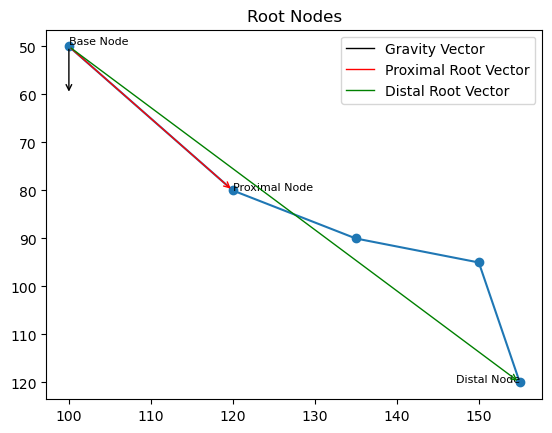

In [151]:
# Sample data
x = [100, 120, 135, 150, 155]
y = [50, 80, 90, 95, 120]

plt.plot(x, y, marker='o')

# Set the origin at the top left
plt.gca().invert_yaxis()  # Invert the y-axis

# Add annotations
plt.text(100, 50, 'Base Node', fontsize=8, ha='left', va='bottom')
plt.text(120, 80, 'Proximal Node', fontsize=8, ha='left')
plt.text(155, 120, 'Distal Node', fontsize=8, ha='right')

# Proximal root vector
plt.annotate(
    '', 
    xy=(120, 80),
    xytext=(100, 50),  # Proximal Node
    arrowprops=dict(arrowstyle='->', color='red', linewidth=1),
    ha="center"
)

# Distal root vector
plt.annotate(
    '',
    xy=(155, 120),
    xytext=(100, 50),  # Distal Node
    arrowprops=dict(arrowstyle='->', color='green', linewidth=1),
    ha="center"
)

# Gravity Vector
plt.annotate(
    '', 
    xy=(100, 60),  # Base Node
    xytext=(100, 50), 
    arrowprops=dict(arrowstyle='->', color='black', linewidth=1),
    ha="center",
)

# Create a legend key (color and label for the vector)
l0 =  mlines.Line2D([], [], color='black', label='Gravity Vector', linestyle='-', linewidth=1)
l1 = mlines.Line2D([], [], color='red', label='Proximal Root Vector', linestyle='-', linewidth=1)
l2 = mlines.Line2D([], [], color='green', label='Distal Root Vector', linestyle='-', linewidth=1)

# Add the legend in the top right
plt.legend(handles=[l0, l1, l2], loc='upper right')
plt.title("Root Nodes")
plt.show()

The root angles are constrained between 0 and 180 degrees.

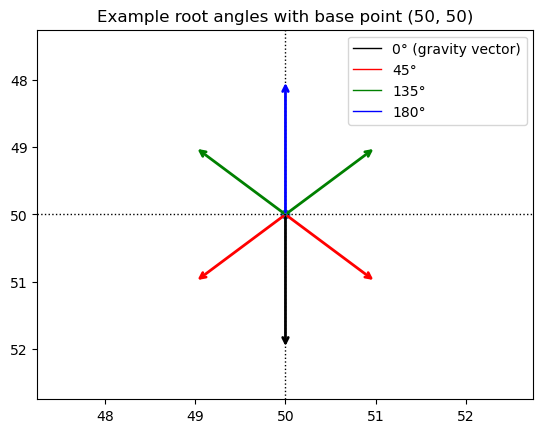

In [165]:
# Sample data
x = [50]
y = [50]

plt.plot(x, y, marker='o')

# Set the origin at the top left
plt.gca().invert_yaxis()  # Invert the y-axis

# gravity vector
plt.annotate(
    '',
    xy=(50, 52),  
    xytext=(50, 50),
    arrowprops=dict(arrowstyle='->', color='black', linewidth=2),
    ha="center",
)

# quadrant 4 vector
plt.annotate(
    '', 
    xy=(49, 51), 
    xytext=(50, 50),
    arrowprops=dict(arrowstyle='->', color='red', linewidth=2),
    ha="center",
)

# quadrant 3 vector
plt.annotate(
    '',  
    xy=(51, 51),
    xytext=(50, 50),
    arrowprops=dict(arrowstyle='->', color='red', linewidth=2),
    ha="center",
)

# quadrant 2 vector
plt.annotate(
    '',  
    xy=(49, 49), 
    xytext=(50, 50),
    arrowprops=dict(arrowstyle='->', color='green', linewidth=2),
    ha="center",
)

# quadrant 1 vector
plt.annotate(
    '',  
    xy=(51, 49), 
    xytext=(50, 50),
    arrowprops=dict(arrowstyle='->', color='green', linewidth=2),
    ha="center",
)

# 180 degree vector
plt.annotate(
    '',  
    xy=(50, 48), 
    xytext=(50, 50),
    arrowprops=dict(arrowstyle='->', color='blue', linewidth=2),
    ha="center",
)

# Dotted horizontal axis line (x-direction)
plt.axhline(y=50, color='black', linestyle=':', linewidth=1)

# Dotted vertical axis line (y-direction)
plt.axvline(x=50, color='black', linestyle=':', linewidth=1)

# Create a legend key (color and label for the vector)
l0 =  mlines.Line2D([], [], color='black', label='0° (gravity vector)', linestyle='-', linewidth=1)
l1 = mlines.Line2D([], [], color='red', label='45°', linestyle='-', linewidth=1)
l2 = mlines.Line2D([], [], color='green', label='135°', linestyle='-', linewidth=1)
l3 = mlines.Line2D([], [], color='blue', label='180°', linestyle='-', linewidth=1)

# Add the legend in the top right
plt.legend(handles=[l0, l1, l2, l3], loc='upper right')
plt.title("Example root angles with base point (50, 50)")

plt.show()

---

### Example Dicot: `canola_7do`

First sample has name 919QDUH
First sample video info: Video(filename="tests/data/canola_7do/919QDUH.h5", shape=(72, 1080, 2048, 1), dataset=vol, backend=HDF5Video)
First sample number of frames: 72

Viewing frame: 0


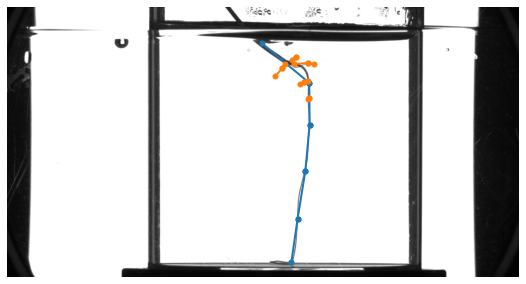

In [81]:
# Change these variables for your own data
folder_path = "tests/data/canola_7do" # Location of h5 files and predictions for dicots

# Find all slp files in the folder
slp_paths = sr.find_all_slp_paths(folder_path)
slp_paths

# Load the cylinder series (one per h5 file)
all_series = sr.load_series_from_slps(slp_paths=slp_paths, h5s=True)

# Get the first series in the list
series = all_series[0]

print(f"First sample has name {series.series_name}")
print(f"First sample video info: {series.video}")
print(f"First sample number of frames: {series.video.shape[0]}\n")

# Blue points = Primary root, Orange points = Lateral roots
frame_idx = 0
print(f"Viewing frame: {frame_idx}")
series.plot(frame_idx, scale=0.25)

### Computing Root Angles

In [91]:
# Get the points of the primary and lateral roots, at frame 0
primary_points = series.get_primary_points(0)
lateral_points = series.get_lateral_points(0)

# Convert primary points to max length points
primary_max_length_pts = get_max_length_pts(primary_points)

# Get the base points of the primary root and lateral roots
primary_base_pt = get_bases(pts=primary_max_length_pts)
lateral_base_pts = get_bases(pts=lateral_points)

#### Angles of the Primary Root

In [ ]:
# Show the points of the primary root
primary_max_length_pts

np.array(
    [
        # Base node
        [1016.78442383, 144.41915894],

        # Proximal node
        [1207.99304199, 304.11700439],
        
        [1208.89245605, 472.43710327],
        [1192.0501709, 656.82409668],
        [1160.87573242, 848.52990723],

        # Distal node
        [1136.09692383, 1020.98138428],
    ]
)

array([[1016.78442383,  144.41915894],
       [1207.99304199,  304.11700439],
       [1208.89245605,  472.43710327],
       [1192.0501709 ,  656.82409668],
       [1160.87573242,  848.52990723],
       [1136.09692383, 1020.98138428]])

In [101]:
##### Primary Angle Proximal #####

# Get node indices of the proximal node
primary_proximal_node_ind = get_node_ind(pts=primary_max_length_pts, proximal=True)

# Get the points of the proximal node
primary_proximal_node_pt = get_nodes(pts=primary_max_length_pts, node_index=primary_proximal_node_ind)

# Get the proximal root vector
primary_proximal_root_vector = get_root_vectors(primary_proximal_node_pt, primary_base_pt)

# Get the angle between the proximal root vector and the gravity vector
primary_angle_proximal = get_vector_angles_from_gravity(primary_proximal_root_vector)

print(f"Primary Angle Proximal: {primary_angle_proximal:2f} degrees")

Primary Angle Proximal: 50.131296 degrees


In [106]:
##### Primary Angle Distal #####

# Get node indices of the distal node
primary_distal_node_ind = get_node_ind(pts=primary_max_length_pts, proximal=False)

# Get the points of the distal node
primary_distal_node_pt = get_nodes(pts=primary_max_length_pts, node_index=primary_distal_node_ind)

# Get the distal root vector
primary_distal_root_vector = get_root_vectors(primary_distal_node_pt, primary_base_pt)

# Get the angle between the distal root vector and the gravity vector
primary_angle_distal = get_vector_angles_from_gravity(primary_distal_root_vector)

print(f"Primary Angle Distal: {primary_angle_distal:2f} degrees")

Primary Angle Distal: 7.751131 degrees


### Angles of the Lateral Roots

In [116]:
# Show the points of the lateral roots, total of 5 instances, each with 3 nodes
lateral_points

np.array(
    [
        # instance 1
        [
            [1140.24816895, 212.87785339],
            [1156.17358398, 200.56602478],
            [np.nan, np.nan],
        ],
        # instance 2
        [
            [1112.55065918, 228.09667969],
            [1100.2980957, 244.82826233],
            [1072.66101074, 276.51275635],
        ],
        # instance 3
        [
            [1148.3215332, 228.33711243],
            [1200.88842773, 224.38265991],
            [1228.0637207, 228.92666626],
        ],
        # instace 4
        [
            [1204.5032959, 296.57699585],
            [1184.70300293, 300.33679199],
            [1172.21728516, 308.23007202],
        ],
        # instance 5
        [
            [np.nan, np.nan],
            [1204.88378906, 364.62561035],
            [1204.66918945, 368.51693726],
        ],
    ]
)

array([[[1140.24816895,  212.87785339],
        [1156.17358398,  200.56602478],
        [          nan,           nan]],

       [[1112.55065918,  228.09667969],
        [1100.2980957 ,  244.82826233],
        [1072.66101074,  276.51275635]],

       [[1148.3215332 ,  228.33711243],
        [1200.88842773,  224.38265991],
        [1228.0637207 ,  228.92666626]],

       [[1204.5032959 ,  296.57699585],
        [1184.70300293,  300.33679199],
        [1172.21728516,  308.23007202]],

       [[          nan,           nan],
        [1204.88378906,  364.62561035],
        [1204.66918945,  368.51693726]]])

In [117]:
##### Lateral Angles Proximal #####

# Get node indices of the proximal node
lateral_proximal_node_inds = get_node_ind(pts=lateral_points, proximal=True)

# Get the points of the proximal node
lateral_proximal_node_pt = get_nodes(pts=lateral_points, node_index=lateral_proximal_node_inds)

# Get the proximal root vector
lateral_proximal_root_vectors = get_root_vectors(lateral_proximal_node_pt, lateral_base_pts)

# Get the angle between the proximal root vector and the gravity vector
lateral_angles_proximal = get_vector_angles_from_gravity(lateral_proximal_root_vectors)

print(f"Lateral Angles Proximal: {lateral_angles_proximal}")

Lateral Angles Proximal: [127.70736239  36.21537484  94.30208947  79.24834357          nan]


In [118]:
##### Lateral Angle Distal #####

# Get node indices of the distal node
lateral_distal_node_inds = get_node_ind(pts=lateral_points, proximal=False)

# Get the points of the distal node
lateral_distal_node_pts = get_nodes(pts=lateral_points, node_index=lateral_distal_node_inds)

# Get the distal root vector
lateral_distal_root_vectors = get_root_vectors(lateral_distal_node_pts, lateral_base_pts)

# Get the angle between the distal root vector and the gravity vector
lateral_angles_distal = get_vector_angles_from_gravity(lateral_distal_root_vectors)

print(f"Lateral Angles Distal: {lateral_angles_distal}")

Lateral Angles Distal: [        nan 39.48485813 89.57640576 70.15383048         nan]


---

#### Refactoring `get_root_angle`: Using `get_nodes`, `get_node_ind`, `get_root_vectors` and `get_vector_angles_from_gravity`

- get_root_angle is an existing function that calculates angles given inputs `pts` and `node_ind`. It is recommended to refactor this function to make it more modular.
- `get_root_angle` parameters
    - `pts`: np.ndarray. (shape: (instances, nodes, 2))
    - `node_ind`: np.ndarray
    - `proximal`: bool (True: proximal angle, False: distal angle)
    - `base_ind`: int (default 0)

In [166]:
# Current implementation of get_root_angle
def get_root_angle(
    pts: np.ndarray, node_ind: np.ndarray, proximal: bool = True, base_ind: int = 0
) -> np.ndarray:
    """Find angles for each root.

    Args:
        pts: Numpy array of points of shape (instances, nodes, 2).
        node_ind: Primary or lateral root node index.
        proximal: Boolean value, where true is proximal (default), false is distal.
        base_ind: Index of base node in the skeleton (default: 0).

    Returns:
        An array of shape (instances,) of angles in degrees, modulo 360.
    """
    # if node_ind is a single  int value, make it as array to keep consistent
    if not isinstance(node_ind, np.ndarray):
        node_ind = [node_ind]

    if np.isnan(node_ind).all():
        return np.nan

    if pts.ndim == 2:
        pts = np.expand_dims(pts, axis=0)

    angs_root = []
    # Calculate the angle for each instance
    for i in range(pts.shape[0]):
        # if the node_ind is 0, do NOT calculate angs
        if node_ind[i] == 0:
            angs = np.nan
        else:
            xy = pts[i, node_ind[i], :] - pts[i, base_ind, :]  # center on base node
            # calculate the angle and convert to the start with gravity direction
            ang = np.arctan2(-xy[1], xy[0]) * 180 / np.pi
            angs = abs(ang + 90) if ang < 90 else abs(-(360 - 90 - ang))
        angs_root.append(angs)
    angs_root = np.array(angs_root)

    # If only one root, return a scalar instead of a single-element array
    if angs_root.shape[0] == 1:
        return angs_root[0]
    return angs_root


### Check Behavior of `get_vector_angles_from_gravity`

- `get_vector_angles_from_gravity`
    - returns the angle between a vector and the gravity vector
    - requires:
        - the start and end point of the vector
        - calculating the resulting vector: x2,y2 - x1,y1 
        - reshaping the x,y coordinates using .reshape(1,2)
    - adjusts angle calculation for the image coordinate system, with (0,0) at the top left
    - constrains angle between 0 and 180 degrees

In [167]:
def get_vector_angles_from_gravity(vectors: np.ndarray) -> np.ndarray:
    """Calculate the angle of given vectors from the gravity vector.

    Args:
        vectors: An array of vectorss with shape (instances, 2), each representing a vector
                from start to end in an instance.

    Returns:
        An array of angles in degrees with shape (instances,), representing the angle
        between each vector and the downward-pointing gravity vector.
    """
    gravity_vector = np.array([0, 1])  # Downwards along the positive y-axis
    # Calculate the angle between the vectors and the gravity vectors
    angles = np.arctan2(vectors[:, 1], vectors[:, 0]) - np.arctan2(
        gravity_vector[1], gravity_vector[0]
    )
    angles = np.degrees(angles)
    # Normalize angles to the range [0, 180] since direction doesn't matter
    angles = np.abs(angles)
    angles[angles > 180] = 360 - angles[angles > 180]

    # If only one root, return a scalar instead of a single-element array
    if angles.shape[0] == 1:
        return angles[0]
    return angles

- Overall, provides expected angles in the correct range
- Assumes that the start and endpoint is known, i.e. the user already knows the start and endpoint of the vector based on the node index
    - you would have to get the base index and the primary/distal node point
- Function requires a list of lists, where each sublist is a vector with 2 elements, x and y. The function calculates the angle between that vector and the gravity vector, adjusting angles to be between [0, 180] while accounting for the pixel coordinate system (cartesian coordinate system where y is negated)
- Zero vector is horizontally aligned, returning 90 degrees as the angle between itself and the gravity vector.

In [169]:
# Checking expected behaviors in the pixel coordinate system

# NaN vectors
nan_vector = get_vector_angles_from_gravity(np.array([np.nan,np.nan]).reshape(1, 2))
xnan_vector = get_vector_angles_from_gravity(np.array([np.nan,1]).reshape(1, 2))
ynan_vector = get_vector_angles_from_gravity(np.array([1,np.nan]).reshape(1, 2))

# Zero vector
zero_vector = get_vector_angles_from_gravity(np.array([0,0]).reshape(1, 2))

# Unit vector in all directions, centered at 0,0
up_vector = get_vector_angles_from_gravity(np.array([0,-1]).reshape(1, 2))
down_vector = get_vector_angles_from_gravity(np.array([0,1]).reshape(1, 2))
left_vector = get_vector_angles_from_gravity(np.array([-1,0]).reshape(1, 2)) 
right_vector = get_vector_angles_from_gravity(np.array([1,0]).reshape(1, 2))
diag_tright_vector = get_vector_angles_from_gravity(np.array([1,-1]).reshape(1, 2))
diag_tleft_vector = get_vector_angles_from_gravity(np.array([-1,-1]).reshape(1, 2))
diag_bright_vector = get_vector_angles_from_gravity(np.array([1,1]).reshape(1, 2))
diag_bleft_vector = get_vector_angles_from_gravity(np.array([-1,1]).reshape(1, 2))

# Passing in an array of vectors (NaN, zero, right, left, up, down)
vectors = np.array([[np.nan,np.nan], [0,0], [1,0], [-1,0], [0,-1], [0,1]])
array_vectors = get_vector_angles_from_gravity(vectors)

print(f"NaN vector angle: {nan_vector:.2f}")               # Expect NaN
print(f"x NaN vector angle: {xnan_vector:.2f}")            # Expect NaN
print(f"y NaN vector angle: {ynan_vector:.2f}")            # Expect NaN
print()
print(f"Zero vector angle: {zero_vector:.2f} degrees")     # Expect 90 degrees (?)
print(f"Right vector angle: {right_vector:.2f} degrees")   # Expect 90 degrees
print(f"Left vector angle: {left_vector:.2f} degrees")     # Expect 90 degrees
print(f"Up vector angle: {up_vector:.2f} degrees")         # Expect 180 degrees
print(f"Down vector angle: {down_vector:.2f} degrees")     # Expect 0 degrees
print()
print(f"Diagonal top-right angle: {diag_tright_vector:.2f} degrees")     # Expect 135 degrees
print(f"Diagonal top-left angle: {diag_tleft_vector:.2f} degrees")       # Expect 135 degrees
print(f"Diagonal bottom-right angle: {diag_bright_vector:.2f} degrees")  # Expect 45 degrees
print(f"Diagonal bottom-left angle: {diag_bleft_vector:.2f} degrees")    # Expect 45 degrees
print()
print(f"Array of Vector Angles: {array_vectors}") # Expect: [nan, 90, 90, 90, 180, 0]

NaN vector angle: nan
x NaN vector angle: nan
y NaN vector angle: nan

Zero vector angle: 90.00 degrees
Right vector angle: 90.00 degrees
Left vector angle: 90.00 degrees
Up vector angle: 180.00 degrees
Down vector angle: 0.00 degrees

Diagonal top-right angle: 135.00 degrees
Diagonal top-left angle: 135.00 degrees
Diagonal bottom-right angle: 45.00 degrees
Diagonal bottom-left angle: 45.00 degrees

Array of Vector Angles: [ nan  90.  90.  90. 180.   0.]
